## Lesson-01 Assignment

#### 今天是2020年1月05日，今天世界上又多了一名AI工程师 :) 

`各位同学大家好，欢迎各位开始学习我们的人工智能课程。这门课程假设大家不具备机器学习和人工智能的知识，但是希望大家具备初级的Python编程能力。根据往期同学的实际反馈，我们的课程完结之后 能力能够超过80%的计算机人工智能/深度学习方向的硕士生的能力。`

## 本次作业的内容

#### 1. 复现课堂代码

在本部分，你需要参照我们给大家的GitHub地址里边的课堂代码，结合课堂内容，复现内容。

In [1]:
import random

In [2]:
two_number = """
numbers = num numbers | num
2_num = num num
num = 0 | 1 | 2 | 3 | 4
"""

def two_num(): return num() + num()

def num(): return random.choice("0 | 1 | 2 | 3 | 4 ".split('|'))

def numbers():
    if random.random() < 0.5:
        return num()
    else:
        return num() + numbers()

In [3]:
num()

'0 '

In [4]:
two_num()

' 2  1 '

In [5]:
for i in range(10):
    print(numbers())

 3 
 3 
 3 
0 
 1 
 1  1  3 
0  3 
 4 
 1 
 3  2 0 0  2  1  3  4 


In [6]:
simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => Adj | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>  蓝色的 | 好看的 | 小小的
"""

def adj(): return random.choice('蓝色的 | 好看的 | 小小的'.split('|')).split()[0]
def adj_star():
    return random.choice([lambda : '', lambda : adj() + adj_star()])()

In [7]:
for i in range(10):
    print(adj_star())

小小的蓝色的
好看的

小小的好看的
小小的
蓝色的


小小的



In [8]:
two_number_op = """
expression => expression num_op | num_op
num_op => num op num
op => + | - | * | /
num => 0 | 1 | 2 | 3 | 4
"""


{
    'two': [['num + num'], ['num - num']],
    'num': ['1', '2', '3', '4', '5', '6']
}
# num is a key, expand
# + is not a key, return
# 如果能把以上的语法，转换成字典，那无论语法怎么变化，程序都不用再变了

{'two': [['num + num'], ['num - num']], 'num': ['1', '2', '3', '4', '5', '6']}

In [9]:
def generate_grammar(grammar_str: str, target, split='=>'):
    grammar = {}
    
    for line in grammar_str.split('\n'):
        if not line: continue
        expression, formula = line.split(split)
        formulas = formula.split('|')
        formulas = [f.split() for f in formulas]
        grammar[expression.strip()] = formulas       
    return grammar

In [10]:
generated_grammar = generate_grammar(two_number_op, target='two')

In [11]:
choice_a_expr = random.choice

def generate_by_grammar(grammar: dict, target: str):
    # test if target is a key
    if target not in grammar: return target
    expr = choice_a_expr(grammar[target])
    return ' '.join(generate_by_grammar(grammar, t) for t in expr)

In [12]:
generate_by_grammar(generated_grammar, 'expression')

'0 / 1 2 * 3'

In [13]:
def generate_by_str(grammar_str, split, target):
    grammar = generate_grammar(grammar_str, target, split)
    return generate_by_grammar(grammar, target)

generate_by_str(two_number_op, split='=>', target='expression')

'3 + 0'

In [14]:
human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们
寻找 = 找找 | 想找点
活动 = 乐子 | 玩的
"""

host = """
host = 寒暄 报数 询问 业务相关 结尾
报数 = 我是 数字 号
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 | 具体业务
玩玩 = null
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？
"""

In [15]:
for i in range(10):
    print(generate_by_str(human, split='=', target='human'))

我 找找 玩的
我们 想找点 乐子
我 找找 乐子
我们 想找点 乐子
我们 找找 玩的
我 想找点 乐子
我们 想找点 玩的
俺 找找 乐子
我 找找 乐子
我们 想找点 乐子


In [16]:
for i in range(10):
    print(generate_by_str(host, split='=', target='host'))

你好 我是 7 3 5 号 请问你要 赌博 吗？
小朋友 你好 我是 2 号 请问你要 null 吗？
先生 您好 我是 8 4 9 号 请问你要 null 吗？
你好 我是 1 号 请问你要 null 吗？
你好 我是 1 号 请问你要 null 吗？
您好 我是 5 号 您需要 打牌 吗？
先生 您好 我是 6 号 请问你要 赌博 吗？
您好 我是 7 号 请问你要 喝酒 吗？
你好 我是 7 9 号 您需要 null 吗？
您好 我是 5 3 号 您需要 喝酒 吗？


In [17]:
simple_programming = '''
programming => if_stmt | assign | while_loop
while_loop => while ( cond ) { change_line stmt change_line }
if_stmt => if ( cond )  { change_line stmt change_line } | if ( cond )  { change_line stmt change_line } else { change_line stmt change_line } 
change_line => /N
cond => var op var
op => | == | < | >= | <= 
stmt => assign | if_stmt
assign => var = var
var =>  var _ num | words 
words => words _ word | word 
word => name | info |  student | lib | database 
nums => nums num | num
num => 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 0
'''

In [18]:
print(generate_by_str(simple_programming, target='programming', split='=>'))

while ( name  name _ info _ 2 _ 7 ) { /N lib _ name _ database _ 7 = name /N }


In [19]:
def pretty_print(line):
    lines = line.split('/N')
    
    code_lines = []
    
    for i, sen in enumerate(lines):
        if i < len(lines) / 2:
            code_lines.append(i * " " + sen)
        else:
            code_lines.append((len(lines) - i) * " " + sen)
    return code_lines

In [20]:
generated_programming = []

for i in range(20):
    generated_programming += pretty_print(generate_by_str(simple_programming, target='programming', split='=>'))
    
for line in generated_programming:
    print(line)

lib _ 2 _ 6 _ 6 = info
student _ 4 = info _ 0
lib _ lib = lib
while ( database _ 3 < database _ 8 ) { 
  if ( lib _ lib _ 7 >= name _ database _ lib ) { 
   info _ info = lib 
    } else { 
     if ( student >= info _ 2 ) { 
      if ( lib _ info < student _ name _ student ) { 
       if ( info <= info ) { 
        name _ name _ student _ database _ 2 _ 1 _ 0 _ 0 = student _ lib _ 0 _ 3 _ 9 
         } else { 
          if ( student _ 0 _ 9 _ 9 <= name _ lib _ 8 ) { 
           name _ 3 _ 5 _ 9 _ 1 _ 3 _ 1 _ 8 = name 
            } else { 
             database _ 0 = lib 
              } 
               } 
                } else { 
                if ( name == student _ name _ 8 ) { 
               if ( name _ database _ info _ 7 _ 6 _ 3 < student _ lib _ name _ name _ lib _ 8 _ 4 _ 4 ) { 
              database _ lib _ database _ 6 = name _ info 
             } else { 
            if ( lib _ 3 == lib ) { 
           info _ database _ database _ info _ 3 _ 1 = student 
          } 
   

## language model

In [21]:
import random
import pandas as pd

filename = '/Users/huazai/Desktop/python/第二章第1节/sqlResult_1558435.csv'

content = pd.read_csv(filename, encoding='gb18030')

content.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [22]:
articles = content['content'].tolist()

In [23]:
len(articles)

89611

In [24]:
import re

In [25]:
def token(string):
    return re.findall('\w+', string)

In [26]:
from collections import Counter

In [27]:
import jieba
with_jieba_cut = Counter(jieba.cut(articles[110]))

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/k2/dnh2dnfx6937855thyp78q9r0000gn/T/jieba.cache
Loading model cost 0.846 seconds.
Prefix dict has been built successfully.


In [28]:
with_jieba_cut.most_common()[:10]

[('，', 88),
 ('的', 73),
 ('。', 39),
 ('\r\n', 27),
 ('了', 20),
 ('们', 18),
 ('工作队', 16),
 ('村民', 15),
 ('收割', 14),
 ('、', 12)]

In [29]:
''.join(token(articles[110]))

'在外国名著麦田里的守望者中作者想要守护麦田里如自己内心一般纯真的孩子们而驻村干部们也在这个炎热的夏天里撸袖子上阵真正做起了村民们的麦田守望者三夏时节不等人你看到了吗不停翻涌起伏仿若铺陈至天边的金黄麦浪中那若隐若现的人影是自治区新闻出版广电局驻和田市肖尔巴格乡合尼村工作队的队员与工作队组织的青年志愿者在这个炎热的夏季他们深入田间地头帮助村民们收割小麦扛起收麦机麦田中的每个人都显得兴致勃勃一天下来就近22亩小麦收割完毕志愿者麦麦提亚森擦去满脸的汗水高兴地告诉驻村队员我们青年志愿者应该多做贡献为村里的脱贫致富出把力工作队带着我们为村里的老人服务看到那些像我爷爷奶奶一样的老人赞许感谢的目光我体会到了帮助他人的快乐自治区新闻出版广电局驻村工作队孙敏艾力依布拉音麦收时节我们在一起6月中旬的和田墨玉麦田金黄静待收割6月14日15日两天自治区高级人民法院驻和田地区墨玉县吐外特乡罕勒克艾日克村工作队与48名村民志愿者一道帮助村里29户有需要的村民进行小麦收割工作田间地头罕勒克艾日克村志愿队的红旗迎风飘扬格外醒目10余台割麦机一起轰鸣男人们在用机器收割小麦的同时几名妇女也加入到志愿队构成了一道美丽的麦收风景休息空闲工作队员和村民们坐在树荫下田埂上互相问好聊天语言交流有困难就用手势动作比划着聊天有趣地交流方式不时引来阵阵欢笑大家在一同享受丰收和喜悦也一同增进着彼此的情感和友谊自治区高级人民法院驻村工作队周春梅艾地艾木阿不拉细看稻菽千重浪6月15日自治区煤田灭火工程局的干部职工们再一次跋涉1000多公里来到了叶城县萨依巴格乡阿亚格欧尔达贝格村见到了自己的亲戚现场处处都透出掩盖不住的喜悦一声声亲切的谢谢一个个结实的拥抱都透露出浓浓的亲情没坐一会儿在嘘寒问暖中大家了解到在麦收的关键时刻部分村民家中却存在收割难的问题小麦成熟期短收获的时间集中天气的变化对小麦最终产量的影响极大如果不能及时收割会有不小损失的于是大家几乎立刻就决定要帮助亲戚们收割麦子在茂密的麦地里干部们每人手持一把镰刀一字排开挽起衣袖卷起裤腿挥舞着镰刀进行着无声的竞赛骄阳似火汗如雨下但这都挡不住大家的热情随着此起彼伏的镰刀割倒麦子的刷刷声响不一会一束束沉甸甸的麦穗就被整齐地堆放了起来当看到自己亲手收割的金黄色麦穗被一簇簇地打成捆运送到晒场每个人的脸上都露出了灿烂的笑容自治区煤田灭火工程局驻村工作队马浩南这是一个收获多多的季节6月1

In [30]:
articles_clean = [''.join(token(str(a))) for a in articles]

In [31]:
len(articles_clean)

89611

In [32]:
with open('article_9k.txt', 'w') as f:
    for a in articles_clean:
        f.write(a + '\n')

In [33]:
def cut(string): return list(jieba.cut(string))

TOKEN = []

for i, line in enumerate((open('article_9k.txt'))):
    if i % 100 == 0: print(i)
        
    if i > 10000: break
    TOKEN += cut(line)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000


In [34]:
from collections import Counter

In [140]:
words_count = Counter(TOKEN)

In [141]:
words_count.most_common(100)

[('的', 416773),
 ('在', 99894),
 ('了', 91783),
 ('是', 72362),
 ('和', 67129),
 ('\n', 50005),
 ('月', 37539),
 ('也', 37213),
 ('有', 34066),
 ('年', 32290),
 ('为', 29715),
 ('等', 29106),
 ('将', 28366),
 ('对', 27873),
 ('与', 26480),
 ('都', 25623),
 ('日', 24728),
 ('不', 24707),
 ('中', 23305),
 ('中国', 22732),
 ('上', 22343),
 ('就', 21454),
 ('6', 21059),
 ('他', 20860),
 ('我', 20313),
 ('人', 18689),
 ('到', 18629),
 ('但', 18377),
 ('这', 18169),
 ('发展', 17722),
 ('企业', 17174),
 ('被', 16815),
 ('一个', 16268),
 ('市场', 16268),
 ('从', 15788),
 ('说', 15392),
 ('还', 15346),
 ('并', 15307),
 ('后', 14765),
 ('要', 14040),
 ('公司', 13854),
 ('会', 13444),
 ('个', 13411),
 ('新', 13231),
 ('而', 13098),
 ('表示', 12711),
 ('没有', 12310),
 ('我们', 12279),
 ('让', 11712),
 ('进行', 11655),
 ('以', 11521),
 ('记者', 11480),
 ('5', 11441),
 ('可以', 10811),
 ('更', 10657),
 ('大', 10575),
 ('很', 10492),
 ('多', 10467),
 ('工作', 10303),
 ('下', 10085),
 ('美国', 10049),
 ('时', 9710),
 ('通过', 9503),
 ('已经', 9484),
 ('自己', 9426),
 ('目前', 93

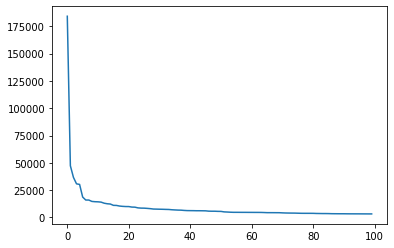

In [37]:
frequiences = [f for w, f in words_count.most_common(100)]

x = [i for i in range(100)]

%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(x, frequiences)

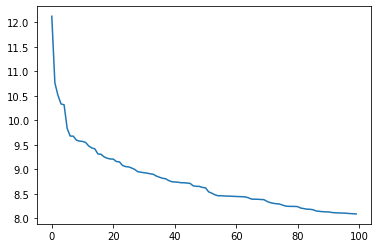

In [38]:
import numpy as np
plt.plot(x, np.log(frequiences))

In [142]:
def prob_1(word):
    return words_count[word] / len(TOKEN)

In [143]:
prob_1('我们')

0.0015024750642855962

In [144]:
TOKEN = [str(t) for t in TOKEN]
TOKEN[:10]

['此外', '自', '本周', '6', '月', '12', '日起', '除', '小米', '手机']

In [145]:
TOKEN_2_GRAM = [''.join(TOKEN[i:i+2]) for i in range(len(TOKEN[:-2]))]

In [146]:
TOKEN_2_GRAM[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

In [147]:
words_count_2 = Counter(TOKEN_2_GRAM)

In [148]:
def prob_2(word1, word2):
    if word1 + word2 in words_count_2: return words_count_2[word1+word2] / words_count[word2]
    else:
        return 1 / len(words_count)

In [130]:
prob_2('我们', '在')

0.10069848661233993

In [131]:
prob_2('在', '吃饭')

0.1111111111111111

In [132]:
prob_2('去', '吃饭')

3.3758692863412326e-05

In [133]:
def get_probablity(sentence):
    words = cut(sentence)
    
    sentence_pro = 1
    
    for i, word in enumerate(words[:-1]):
        next_ = words[i+1]
        
        probability = prob_2(word, next_)
        
        sentence_pro *= probability
    sentence_pro *= prob_1(words[-1])
    return sentence_pro


In [150]:
get_probablity('小明今天抽奖抽到一台苹果手机')

3.7524296341917327e-32

In [151]:
get_probablity('小明今天抽奖抽到一架波音飞机')

5.971748549784297e-32

In [137]:
get_probablity('洋葱奶昔来一杯')

9.415234397463563e-21

In [139]:
get_probablity("养乐多绿来一杯")

2.788980733216657e-16

In [61]:
for sen in [generate_by_str(simple_grammar, split='=>', target='sentence') for i in range(10)]:
    print('sentence: {} with Prb: {}'.format(sen, get_probablity(sen)))

sentence: 一个 好看的 null 篮球 看见 一个 null 桌子 with Prb: 3.382180619215104e-98
sentence: 这个 null 篮球 坐在 这个 蓝色的 null 篮球 with Prb: 2.45976772306553e-98
sentence: 一个 null 篮球 看着 这个 蓝色的 null 篮球 with Prb: 2.45976772306553e-98
sentence: 这个 null 篮球 听着 一个 null 篮球 with Prb: 5.034366273359772e-85
sentence: 一个 好看的 null 篮球 看着 一个 好看的 蓝色的 null 桌子 with Prb: 1.1716586774490812e-135
sentence: 一个 小小的 小小的 蓝色的 null 桌子 看着 这个 null 篮球 with Prb: 1.321220169123763e-124
sentence: 一个 好看的 null 篮球 听着 这个 null 篮球 with Prb: 1.0987485545065193e-103
sentence: 一个 null 篮球 听着 这个 蓝色的 null 篮球 with Prb: 7.99089857822923e-104
sentence: 一个 null 小猫 看见 这个 小小的 null 桌子 with Prb: 1.1357528553645626e-92
sentence: 这个 null 小猫 看着 这个 null 女人 with Prb: 1.5496844996929243e-79


In [62]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = get_probablity(s1), get_probablity(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probablity {}'.format(s1, p1))
    print('-'*4 + ' {} with probablity {}'.format(s2, p2))


明天晚上请你吃大餐，我们一起吃苹果 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probablity 1.7051133711305114e-62
---- 明天晚上请你吃大餐，我们一起吃苹果 with probablity 1.7051133711305114e-62
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probablity 1.599536134964894e-32
---- 真是一只好看的小猫 with probablity 5.908452950284614e-26
今晚我去吃火锅 is more possible
---- 今晚我去吃火锅 with probablity 8.333167524520602e-19
---- 今晚火锅去吃我 with probablity 1.933675511002237e-25
养乐多绿来一杯 is more possible
---- 洋葱奶昔来一杯 with probablity 1.9840875058382383e-20
---- 养乐多绿来一杯 with probablity 7.3289295697906e-14


## 基础理论部分

> **评阅点**：每道题是否回答完整

#### 0. Can you come up out 3 sceneraies which use AI methods? 

Ans: 
- 智能语音机器人
- 自动驾驶
- 人脸识别

#### 1. How do we use Github; Why do we use Jupyter and Pycharm;

Ans:
- GitHub是通过git进行版本控制的代码托管平台，只需要去上面创建一个repository，然后将你本地的代码推上去，其他人就可以获取你的代码。

- Jupyter:可以在网页中直接编写代码和运行代码，即时运行，运行结果也会直接在代码块下显示。交互性强，直观、方便。

- Pycharm：Python专用的IDE，是功能齐全的集成开发环境，不需要复杂的配置。支持全面的Python开发，不论是数据科学还是非数据科学项目

#### 2. What's the Probability Model?

Ans:概率模型
A probability model is a mathematical representation of a random phenomenon.
It is defined by its sample, events within the sample space, and probabilities associated with each event.

概率模型是对随机现象的数学描述，也就是用数学的方式来说明随机现象是怎样的。
我们通过一个随机现象中，各种可能性，以及每种可能性发生的概率来定义概率模型。
比如掷骰子，一共可能有6中结果，每种结果的可能性都是 1/6

#### 3. Can you came up with some sceneraies at which we could use Probability Model?

Ans:
- 球赛中精算师计算各种可能的比赛结果的概率，以及设定适当的赔率，从而保证博彩公司总是能盈利
- 通过概率判断一封邮件是不是垃圾邮件，从而过滤垃圾邮件
- 投资顾问根据各种可能的发生的概率，给客户合适的投资组合建议

#### 4. Why do we use probability and what's the difficult points for programming based on parsing and pattern match?

Ans:基于解析、模式匹配的方法，如果更换了语法，所有写过的程序，都要重新写。我们的目标是，能做一个程序，当输入的数据变化时，程序不用重写。

#### 5. What's the Language Model;

Ans:语言模型，就是一串词序列的概率分布。作用是为一个长度为m的文本确定一个概率分布P，表示这段文本存在的可能性。

#### 6. Can you came up with some sceneraies at which we could use Language Model?


Ans:
- machine translation 机器翻译
- spell correction 拼写检查、纠错
- speech recognition 语音识别

#### 7. What's the 1-gram language model;

Ans:当前这个词的出现只和它前面的1个词有关

#### 8. What's the disadvantages and advantages of 1-gram language model;

Ans:优势是简单，但不够准确

#### 9. What't the 2-gram models;

Ans:当前这个词的出现只和它前面的2个词有关

## 编程实践部分

#### 1. 设计你自己的句子生成器

如何生成句子是一个很经典的问题，从1940s开始，图灵提出机器智能的时候，就使用的是人类能不能流畅和计算机进行对话。和计算机对话的一个前提是，计算机能够生成语言。

计算机如何能生成语言是一个经典但是又很复杂的问题。 我们课程上为大家介绍的是一种基于规则（Rule Based）的生成方法。该方法虽然提出的时间早，但是现在依然在很多地方能够大显身手。
值得说明的是，现在很多很实用的算法，都是很久之前提出的，例如，二分查找提出于1940s, Dijstra算法提出于1960s 等等。

在著名的电视剧，电影《西部世界》中，这些机器人们语言生成的方法就是使用的SyntaxTree生成语言的方法。

> 
>

![WstWorld](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1569578233461&di=4adfa7597fb380e7cc0e67190bbd7605&imgtype=0&src=http%3A%2F%2Fs1.sinaimg.cn%2Flarge%2F006eYYfyzy76cmpG3Yb1f)

> 
>

在这一部分，需要各位同学首先定义自己的语言。 大家可以先想一个应用场景，然后在这个场景下，定义语法。例如：

在西部世界里，一个”人类“的语言可以定义为：
``` 
human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 看看 | 找找 | 想找点
活动 = 乐子 | 玩的
"""
```

一个“接待员”的语言可以定义为
```
host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = 耍一耍 | 玩一玩
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？"""

```




请定义你自己的语法: 

第一个语法：

In [63]:
audience = '''
audience = 前提条件 称谓 期望 动作 对象
前提条件 = 假设词 条件
假设词 = 如果 | 既然
条件 = 在中国 | 在美国 
时间 = 以前的时候 | 将来
称谓 = 我 | 我们 | 大家 | 我们大家 | 他们 | 你们
期望 = 想 | 想要 | 希望 | 如果能
动作 = 看 | 参与 | 体验 | 感受
对象 = 真人秀 | 电视剧 | 电影 | 动画片
'''

> **评阅点**： 是否提出了和课程上区别较大的语法结构

第二个语法：

In [64]:
story = '''
story = 时间 地点 人物 事件 结果
时间 = 很久很久以前 | 今天上午 | 将来的某一天
地点 = 在那遥远的地方 | 村东头 | 北京天安门
人物 = 一群野蛮人 | 一帮知识分子 | 一个整编师
事件 = 登上了城楼 | 爬上了珠穆朗玛峰 | 跨过了山和大海
结果 = 他们成名了 | 他们消失了 | 他们平凡着
'''

> **评阅点**：是否和上一个语法区别比较大

TODO: 然后，使用自己之前定义的generate函数，使用此函数生成句子。

In [65]:
generate_by_str(audience, target='audience', split='=')

'如果 在中国 我们大家 如果能 看 动画片'

In [66]:
generate_by_str(story, target='story', split='=')

'很久很久以前 村东头 一群野蛮人 跨过了山和大海 他们消失了'

TODO: 然后，定义一个函数，generate_n，将generate扩展，使其能够生成n个句子:

In [67]:
def generate_n(n, grammar_str, split, target):
    for i in range(n):
        sentence = generate_by_str(grammar_str, split, target)
        print(sentence)

In [68]:
generate_n(10, story, target='story', split='=')

将来的某一天 村东头 一个整编师 跨过了山和大海 他们平凡着
将来的某一天 北京天安门 一群野蛮人 爬上了珠穆朗玛峰 他们平凡着
很久很久以前 在那遥远的地方 一帮知识分子 爬上了珠穆朗玛峰 他们消失了
很久很久以前 在那遥远的地方 一帮知识分子 跨过了山和大海 他们平凡着
很久很久以前 村东头 一帮知识分子 爬上了珠穆朗玛峰 他们平凡着
今天上午 在那遥远的地方 一群野蛮人 跨过了山和大海 他们平凡着
今天上午 在那遥远的地方 一群野蛮人 登上了城楼 他们消失了
将来的某一天 村东头 一个整编师 跨过了山和大海 他们消失了
今天上午 北京天安门 一帮知识分子 跨过了山和大海 他们平凡着
很久很久以前 北京天安门 一帮知识分子 跨过了山和大海 他们平凡着


> **评阅点**; 运行代码，观察是否能够生成多个句子

#### 2. 使用新数据源完成语言模型的训练

按照我们上文中定义的`prob_2`函数，我们更换一个文本数据源，获得新的Language Model:

1. 下载文本数据集（你可以在以下数据集中任选一个，也可以两个都使用）
    + 可选数据集1，保险行业问询对话集： https://github.com/Computing-Intelligence/insuranceqa-corpus-zh/raw/release/corpus/pool/train.txt.gz
    + 可选数据集2：豆瓣评论数据集：https://github.com/Computing-Intelligence/datasource/raw/master/movie_comments.csv
2. 修改代码，获得新的**2-gram**语言模型
    + 进行文本清洗，获得所有的纯文本
    + 将这些文本进行切词
    + 送入之前定义的语言模型中，判断文本的合理程度

> **评阅点** 1. 是否使用了新的数据集； 2. csv(txt)数据是否正确解析

In [102]:
filename_another = '/Users/huazai/Desktop/python/第二章第1节/movie_comments.csv'

content_another = pd.read_csv(filename_another)

In [103]:
content_another.head()

,id,link,name,comment,star
0,1,https://movie.douban.com/subject/26363254/,战狼2,吴京意淫到了脑残的地步，看了恶心想吐,1
1,2,https://movie.douban.com/subject/26363254/,战狼2,首映礼看的。太恐怖了这个电影，不讲道理的，完全就是吴京在实现他这个小粉红的英雄梦。各种装备轮...,2
2,3,https://movie.douban.com/subject/26363254/,战狼2,吴京的炒作水平不输冯小刚，但小刚至少不会用主旋律来炒作…吴京让人看了不舒服，为了主旋律而主旋...,2
3,4,https://movie.douban.com/subject/26363254/,战狼2,凭良心说，好看到不像《战狼1》的续集，完虐《湄公河行动》。,4
4,5,https://movie.douban.com/subject/26363254/,战狼2,中二得很,1


In [104]:
comments = content_another['comment'].tolist()

In [105]:
len(comments)

261497

In [106]:
comments_clean = [''.join(token(str(a))) for a in comments]

In [107]:
len(comments_clean)

261497

In [109]:
with open('comments_9k.txt', 'w') as f:
    for a in comments_clean:
        f.write(a + '\n')

In [120]:
NEW_TOKEN = []

for i, line in enumerate((open('comments_9k.txt'))):
    if i % 100 == 0: print(i)
        
    if i > 10000: break
    NEW_TOKEN += cut(line)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000


In [121]:
words_count = Counter(NEW_TOKEN)

In [122]:
prob_1('我们')

3.242575877805057e-05

In [123]:
NEW_TOKEN[:10]

['吴京', '意淫', '到', '了', '脑残', '的', '地步', '看', '了', '恶心']

In [89]:
NEW_TOKEN = [str(t) for t in NEW_TOKEN]

In [158]:
TOKEN_2_GRAM = [''.join(NEW_TOKEN[i:i+2]) for i in range(len(NEW_TOKEN[:-2]))]
words_count_2 = Counter(TOKEN_2_GRAM)

TOKEN_3_GRAM = [''.join(NEW_TOKEN[i:i+3]) for i in range(len(NEW_TOKEN[:-3]))]
words_count_3 = Counter(TOKEN_3_GRAM)

def prob_3(word1, word2, word3):
    if word1 + word2 + word3 in words_count_3: 
        return words_count_3[word1+word2+word3] / words_count_2[word2+word3]
    else:
        return 1 / len(words_count_2)

In [160]:
prob_3('我们', '在', '吃饭')

6.513215313871846e-06

In [163]:
def get_probablity_3(sentence):
    words = cut(sentence)
    
    sentence_pro = 1
    
    for i, word in enumerate(words[:-2]):
        next_1 = words[i+1]
        next_2 = words[i+2]
        probability = prob_3(word, next_1, next_2)
        sentence_pro *= probability
    sentence_pro *= prob_1(words[-1])
    return sentence_pro


In [164]:
get_probablity_3('小明今天抽奖抽到一台苹果手机')

3.0104671238614292e-30

In [165]:
get_probablity_3('小明今天抽奖抽到一架波音飞机')

1.9720782731345712e-30

#### 3. 获得最优质的的语言

当我们能够生成随机的语言并且能判断之后，我们就可以生成更加合理的语言了。请定义 generate_best 函数，该函数输入一个语法 + 语言模型，能够生成**n**个句子，并能选择一个最合理的句子: 



提示，要实现这个函数，你需要Python的sorted函数

In [166]:
sorted([1, 3, 5, 2])

[1, 2, 3, 5]

这个函数接受一个参数key，这个参数接受一个函数作为输入，例如

In [167]:
sorted([(2, 5), (1, 4), (5, 0), (4, 4)], key=lambda x: x[0])

[(1, 4), (2, 5), (4, 4), (5, 0)]

能够让list按照第0个元素进行排序.

In [168]:
sorted([(2, 5), (1, 4), (5, 0), (4, 4)], key=lambda x: x[1])

[(5, 0), (1, 4), (4, 4), (2, 5)]

能够让list按照第1个元素进行排序.

In [169]:
sorted([(2, 5), (1, 4), (5, 0), (4, 4)], key=lambda x: x[1], reverse=True)

[(2, 5), (1, 4), (4, 4), (5, 0)]

能够让list按照第1个元素进行排序, 但是是递减的顺序。

In [184]:
def generate_best(grammar, split='=>', target='sentence'):
    arr = []
    for sen in [generate_by_str(simple_grammar, split='=>', target='sentence') for i in range(10)]:
        pro = get_probablity_3(sen)
        arr.append((sen, pro))
    sorted(arr, key=lambda x: x[1], reverse=True)[0]
    return arr


In [185]:
generate_best(simple_grammar, split='=>', target='sentence')

[('一个 小小的 好看的 好看的 null 小猫 听着 一个 null 桌子', 1.2703274114160743e-109),
 ('这个 好看的 蓝色的 null 桌子 听着 一个 好看的 好看的 蓝色的 好看的 好看的 小小的 蓝色的 好看的 小小的 小小的 好看的 null 小猫',
  1.411969023079261e-255),
 ('这个 null 女人 看着 这个 蓝色的 小小的 蓝色的 小小的 null 桌子', 8.273915949666355e-115),
 ('一个 null 篮球 看着 这个 好看的 null 篮球', 7.684472923990343e-78),
 ('一个 null 小猫 看着 一个 null 女人', 4.335999745719932e-62),
 ('一个 好看的 好看的 小小的 null 小猫 听着 这个 好看的 蓝色的 null 女人', 6.982658102264498e-140),
 ('一个 好看的 null 小猫 看见 这个 null 篮球', 7.684472923990343e-78),
 ('一个 蓝色的 好看的 小小的 小小的 好看的 蓝色的 null 女人 坐在 一个 好看的 小小的 蓝色的 小小的 null 小猫',
  1.5778851191644237e-198),
 ('一个 蓝色的 null 篮球 听着 这个 蓝色的 null 小猫', 5.444551490119499e-100),
 ('这个 null 小猫 看见 一个 null 篮球', 2.7811715540728857e-62)]

好了，现在我们实现了自己的第一个AI模型，这个模型能够生成比较接近于人类的语言。

> **评阅点**： 是否使用 lambda 语法进行排序

Q: 这个模型有什么问题？ 你准备如何提升？ 

Ans:数据源使用的是新闻或影评等某方面的，不够全面

>**评阅点**: 是否提出了比较实际的问题，例如OOV问题，例如数据量，例如变成 3-gram问题。

##### 以下内容为可选部分，对于绝大多数同学，能完成以上的项目已经很优秀了，下边的内容如果你还有精力可以试试，但不是必须的。

#### 4. (Optional) 完成基于Pattern Match的语句问答
> 我们的GitHub仓库中，有一个assignment-01-optional-pattern-match，这个难度较大，感兴趣的同学可以挑战一下。


#### 5. (Optional) 完成阿兰图灵机器智能原始论文的阅读
1. 请阅读阿兰图灵关于机器智能的原始论文：https://github.com/Computing-Intelligence/References/blob/master/AI%20%26%20Machine%20Learning/Computer%20Machinery%20and%20Intelligence.pdf 
2. 并按照GitHub仓库中的论文阅读模板，填写完毕后发送给我: mqgao@kaikeba.com 谢谢

> 

各位同学，我们已经完成了自己的第一个AI模型，大家对人工智能可能已经有了一些感觉，人工智能的核心就是，我们如何设计一个模型、程序，在外部的输入变化的时候，我们的程序不变，依然能够解决问题。人工智能是一个很大的领域，目前大家所熟知的深度学习只是其中一小部分，之后也肯定会有更多的方法提出来，但是大家知道人工智能的目标，就知道了之后进步的方向。

然后，希望大家对AI不要有恐惧感，这个并不难，大家加油！

>

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1561828422005&di=48d19c16afb6acc9180183a6116088ac&imgtype=0&src=http%3A%2F%2Fb-ssl.duitang.com%2Fuploads%2Fitem%2F201807%2F28%2F20180728150843_BECNF.thumb.224_0.jpeg)